In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Read in the DataFrame
df = pd.read_csv("dataset/college_datav3.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6702 entries, Alabama A & M University to High Desert Medical College
Data columns (total 23 columns):
OPEID               6702 non-null int64
REGION              6702 non-null int64
SAT_AVG_ALL         1387 non-null float64
PCTPELL             6066 non-null float64
PCTFLOAN            6066 non-null float64
ADM_RATE_ALL        2180 non-null float64
UG                  4367 non-null float64
AVGFACSAL           4104 non-null float64
COMPL_RPY_5YR_RT    5708 non-null object
DEBT_MDN            6681 non-null object
MEDIAN_HH_INC       4993 non-null object
ICLEVEL             6702 non-null int64
HIGHDEG             6702 non-null int64
CONTROL             6702 non-null int64
WOMENONLY           6368 non-null float64
MENONLY             6368 non-null float64
LOCALE              6368 non-null float64
Tuition             5735 non-null float64
Degree_Type         6702 non-null object
Ownership           6702 non-null object
Regions             6702 no

## Building a FacetGrid
- Seaborn's FacetGrid is the foundation for building data-aware grids. A data-aware grid allows you to create a series of small plots that can be useful for understanding complex data relationships.

- For these exercises, we will continue to look at the College Scorecard Data from the US Department of Education. This rich dataset has many interesting data elements that we can plot with Seaborn.

- When building a FacetGrid, there are two steps:

    - Create a FacetGrid object with columns, rows, or hue.
    - Map individual plots to the grid.

c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


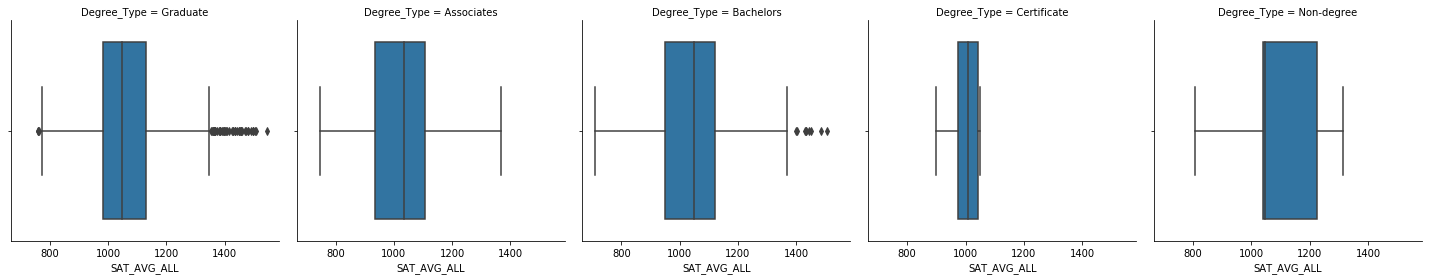

<Figure size 432x288 with 0 Axes>

In [3]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             col="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'],
             size=4, aspect=1)

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.boxplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


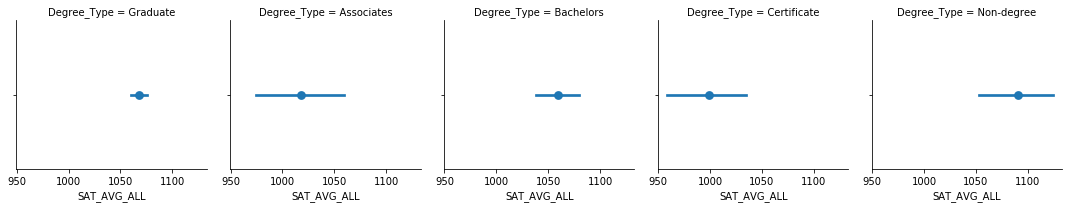

<Figure size 432x288 with 0 Axes>

In [4]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df,
                   col="Degree_Type",
                   row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

## Using a factorplot
- In many cases, Seaborn's factorplot() can be a simpler way to create a FacetGrid. Instead of creating a grid and mapping the plot, we can use the factorplot() to create a plot with one line of code.

- For this exercise, we will recreate one of the plots from the previous exercise using factorplot() and show how to create a boxplot on a data-aware grid.

c:\program files\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


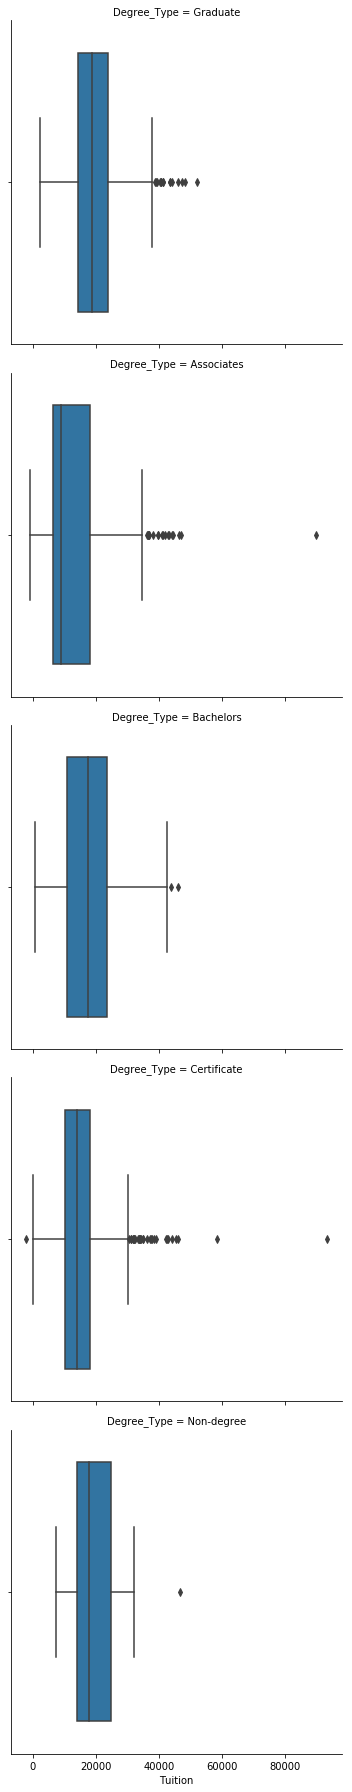

<Figure size 432x288 with 0 Axes>

In [5]:
# Create a factor plot that contains boxplots of Tuition values
sns.factorplot(data=df,
               x='Tuition',
               kind='box',
               row='Degree_Type')

plt.show()
plt.clf()

c:\program files\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


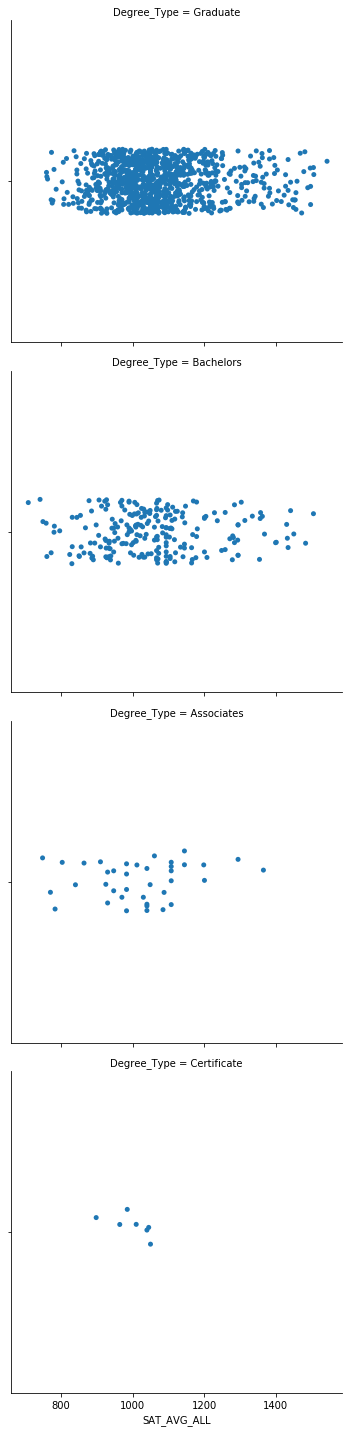

<Figure size 432x288 with 0 Axes>

In [6]:
# Create a facetted pointplot of Average SAT scores facetted by Degree Type 
sns.factorplot(data=df,
               x='SAT_AVG_ALL',
               kind='strip',
               row='Degree_Type',
               row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

c:\program files\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x288 with 0 Axes>

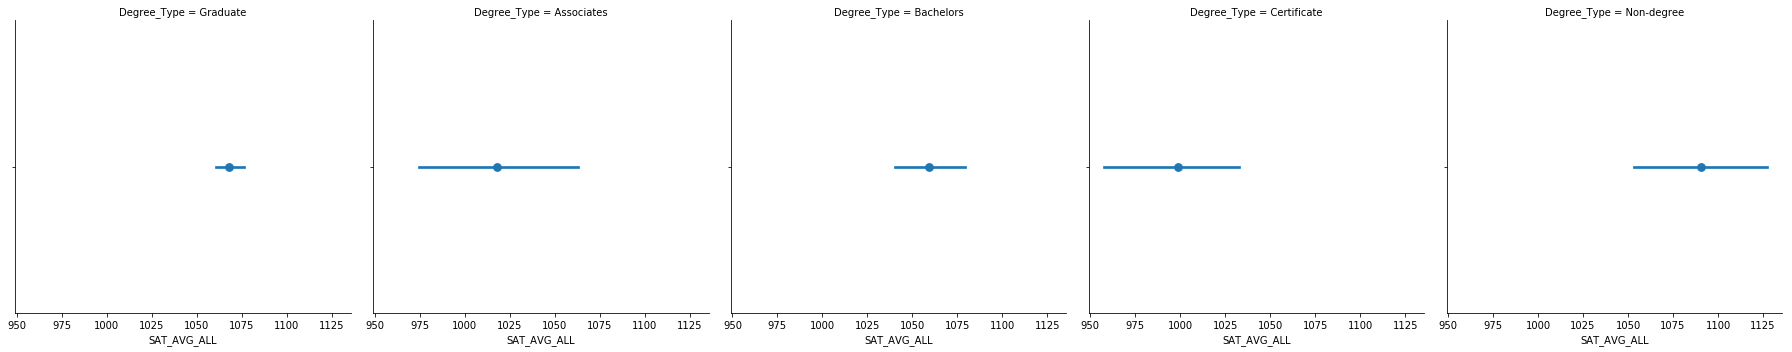

<Figure size 432x288 with 0 Axes>

In [7]:
# Create a facetted pointplot of Average SAT scores facetted by Degree Type 
plt.figure(figsize=(10, 4))
sns.factorplot(data=df,
               x='SAT_AVG_ALL',
               kind='point',
               col='Degree_Type',
               row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

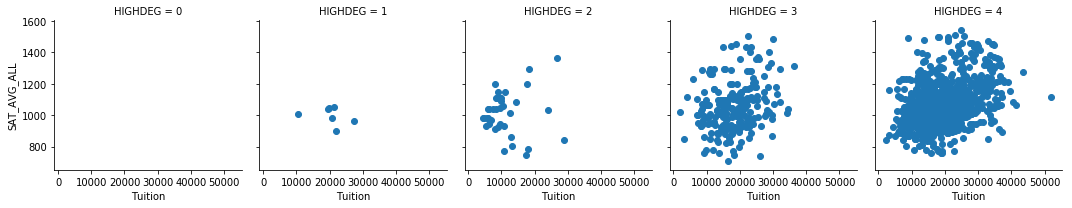

In [8]:
g = sns.FacetGrid(df, col="HIGHDEG")  
g.map(plt.scatter, 'Tuition', 'SAT_AVG_ALL')
plt.show()

## lmplot
- The lmplot is used to plot scatter plots with regression lines on FacetGrid objects. The API is similar to factorplot with the difference that the default behavior of lmplot is to plot regression lines.

- For the first set of exercises, we will look at the Undergraduate population (UG) and compare it to the percentage of students receiving Pell Grants (PCTPELL).

- For the second lmplot exercise, we can look at the relationships between Average SAT scores and Tuition across the different degree types and public vs. non-profit schools.

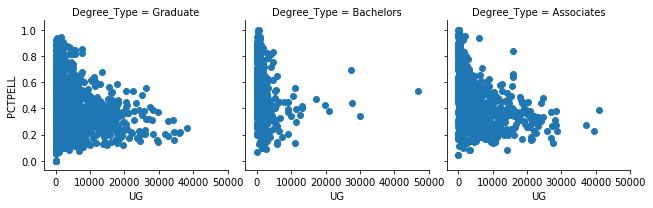

<Figure size 432x288 with 0 Axes>

In [9]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=['Graduate', 'Bachelors', 'Associates'])

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

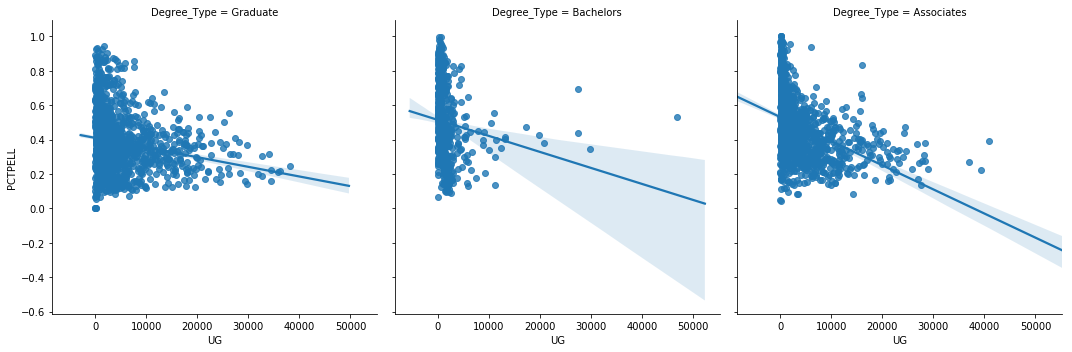

<Figure size 432x288 with 0 Axes>

In [10]:
# Create the plot as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=['Graduate', 'Bachelors', 'Associates'])

plt.show()
plt.clf()

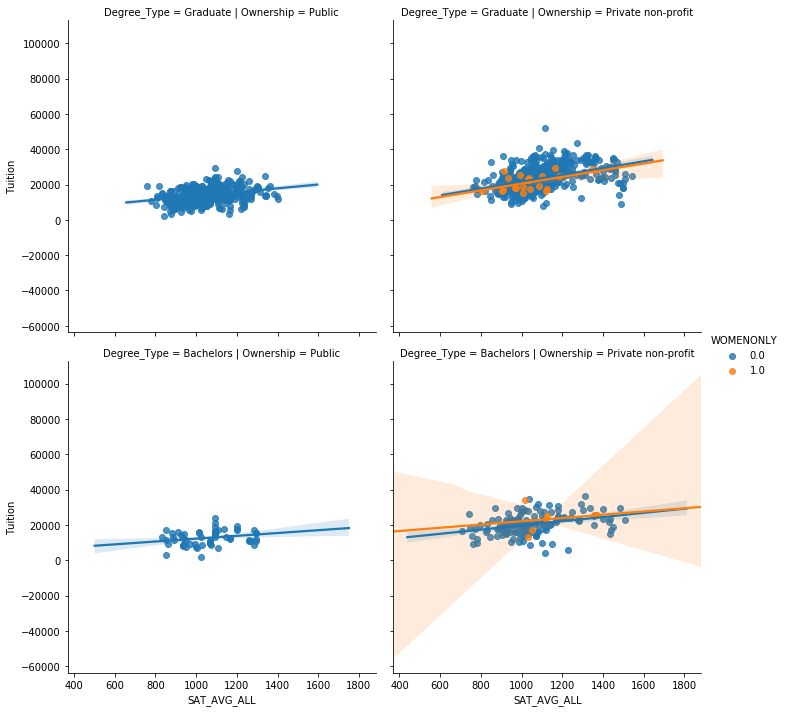

<Figure size 432x288 with 0 Axes>

In [11]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type
# and hue based on the WOMENONLY column and columns defined by inst_order
sns.lmplot(data=df,
           x='SAT_AVG_ALL',
           y='Tuition',
           col="Ownership",
           row='Degree_Type', 
           row_order=['Graduate', 'Bachelors'],
           hue='WOMENONLY',
           col_order=['Public', 'Private non-profit'])

plt.show()
plt.clf()

## PairGrid
- When exploring a dataset, one of the earliest tasks is exploring the relationship between pairs of variables. This step is normally a precursor to additional investigation.

- Seaborn supports this pair-wise analysis using the PairGrid. In this exercise, we will look at the Car Insurance Premium data we analyzed in Chapter 1. All data is available in the df variable.

In [12]:
df = pd.read_csv("dataset/insurance_premiums.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
State                              51 non-null object
fatal_collisions                   51 non-null float64
fatal_collisions_speeding          51 non-null int64
fatal_collisions_alc               51 non-null int64
fatal_collisions_not_distracted    51 non-null int64
fatal_collisions_no_hist           51 non-null int64
premiums                           51 non-null float64
insurance_losses                   51 non-null float64
Region                             51 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 3.7+ KB


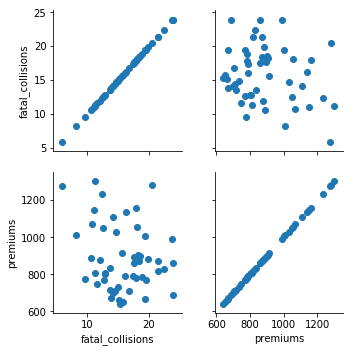

<Figure size 432x288 with 0 Axes>

In [13]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)
plt.show()
plt.clf()

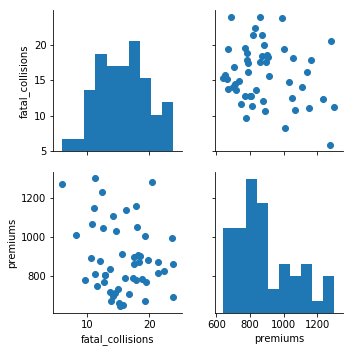

<Figure size 432x288 with 0 Axes>

In [14]:
# Create the same pairgrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

plt.clf()

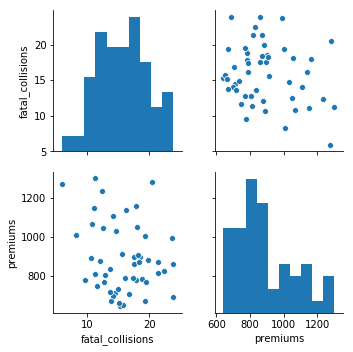

<Figure size 432x288 with 0 Axes>

In [15]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
             vars=["fatal_collisions", "premiums"],
             kind='scatter')

plt.show()
plt.clf()

## pairplot
- The pairplot() function is generally a more convenient way to look at pairwise relationships. In this exercise, we will create the same results as the PairGrid using less code. Then, we will explore some additional functionality of the pairplot(). We will also use a different palette and adjust the transparency of the diagonal plots using the alpha parameter.

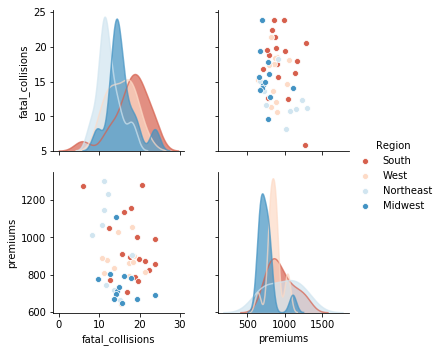

<Figure size 432x288 with 0 Axes>

In [16]:
# Plot a pairplot and use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.7})
plt.show()
plt.clf()

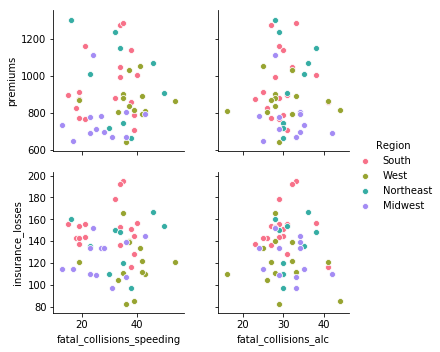

<Figure size 432x288 with 0 Axes>

In [17]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

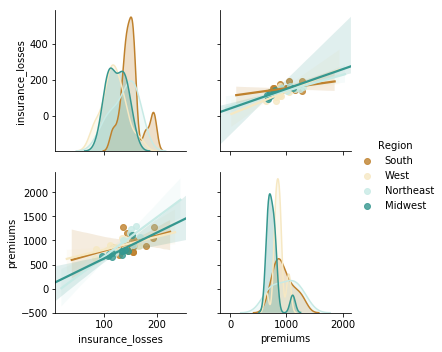

<Figure size 432x288 with 0 Axes>

In [18]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

## Building a JointGrid and jointplot
- Seaborn's JointGrid combines univariate plots such as histograms, rug plots and kde plots with bivariate plots such as scatter and regression plots. The process for creating these plots should be familiar to you now. These plots also demonstrate how Seaborn provides convenient functions to combine multiple plots together.

- For these exercises, we will use the bike share data that we reviewed earlier. In this exercise, we will look at the relationship between humidity levels and total rentals to see if there is an interesting relationship we might want to explore later.

In [19]:
# Read in the DataFrame
df = pd.read_csv("dataset/college_datav3.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6702 entries, Alabama A & M University to High Desert Medical College
Data columns (total 23 columns):
OPEID               6702 non-null int64
REGION              6702 non-null int64
SAT_AVG_ALL         1387 non-null float64
PCTPELL             6066 non-null float64
PCTFLOAN            6066 non-null float64
ADM_RATE_ALL        2180 non-null float64
UG                  4367 non-null float64
AVGFACSAL           4104 non-null float64
COMPL_RPY_5YR_RT    5708 non-null object
DEBT_MDN            6681 non-null object
MEDIAN_HH_INC       4993 non-null object
ICLEVEL             6702 non-null int64
HIGHDEG             6702 non-null int64
CONTROL             6702 non-null int64
WOMENONLY           6368 non-null float64
MENONLY             6368 non-null float64
LOCALE              6368 non-null float64
Tuition             5735 non-null float64
Degree_Type         6702 non-null object
Ownership           6702 non-null object
Regions             6702 no

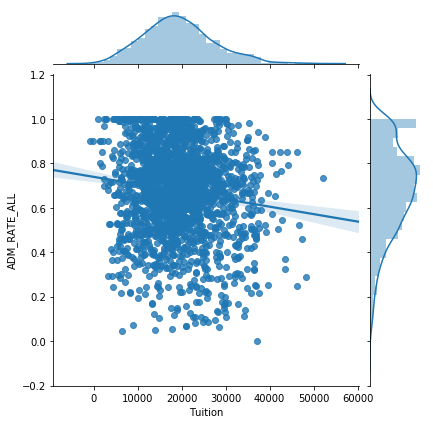

<Figure size 432x288 with 0 Axes>

In [20]:
g = sns.JointGrid(data=df, x="Tuition", y="ADM_RATE_ALL")  
g.plot(sns.regplot, sns.distplot)
plt.show()
plt.clf()

In [21]:
from scipy import stats

c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


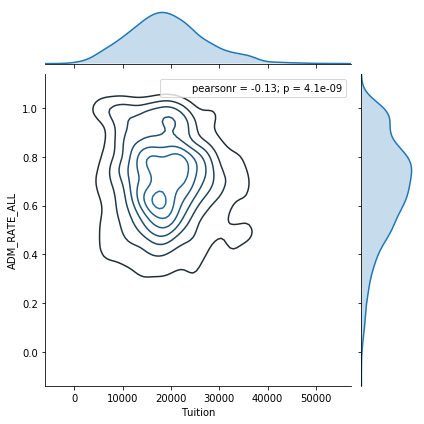

In [22]:
g = sns.JointGrid(data=df, x="Tuition", y="ADM_RATE_ALL")   
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)   
g = g.annotate(stats.pearsonr)
plt.show()

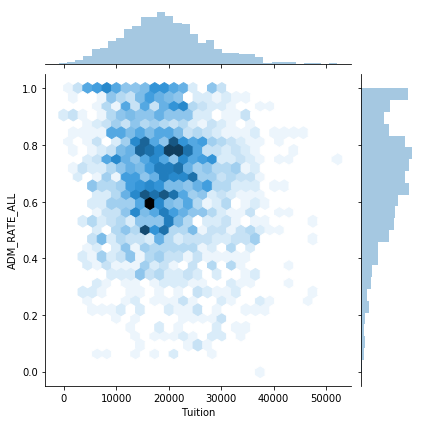

In [23]:
# Joinplot
sns.jointplot(data=df, x="Tuition", y="ADM_RATE_ALL", kind='hex')
plt.show()

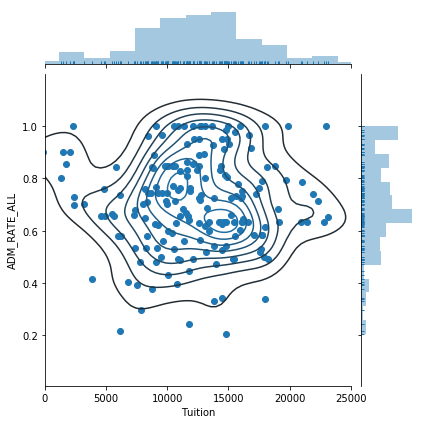

In [24]:
# custumizing a jointplot
g = (sns.jointplot(x="Tuition", y="ADM_RATE_ALL", 
                   kind='scatter',  xlim=(0, 25000),
                   marginal_kws=dict(bins=15, rug=True),  
                   data=df.query('UG < 2500 & Ownership == "Public"'))
.plot_joint(sns.kdeplot))
plt.show()